# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice_count = len(pd.unique(combined_df["Mouse ID"]))
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicates = combined_df[combined_df.duplicated()]
mice_duplicates["Mouse ID"]

861    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicates_data = combined_df[combined_df["Mouse ID"] == "g989"]
mice_duplicates_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop(labels=(mice_duplicates_data.index))
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(pd.unique(clean_df["Mouse ID"]))
mice_count_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# makes series of each statistical method, then combine the series into a summary dataframe
mean_tumor_volume = clean_df.groupby("Drug Regimen").mean("Tumor Volume (mm3)")["Tumor Volume (mm3)"]
median_tumor_volume = clean_df.groupby("Drug Regimen").median("Tumor Volume (mm3)")["Tumor Volume (mm3)"]
variance_tumor_volume = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_tumor_volume = clean_df.groupby("Drug Regimen").std("Tumor Volume (mm3)")["Tumor Volume (mm3)"]
sem_tumor_volume = clean_df.groupby("Drug Regimen").sem("Tumor Volume (mm3)")["Tumor Volume (mm3)"]

summary_df_1 = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                             "Median Tumor Volume": median_tumor_volume})
                             "Variance Tumor Volume": variance_tumor_volume,
                             "Standard Deviaton Tumor Volume": variance_tumor_volume,
                             "Error Tumor Volume": sem_tumor_volume})

summary_df_1

IndentationError: unexpected indent (3962861258.py, line 16)

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_df_2 = clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_df_2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Timepoints in Mice for Drug Regimens'}, xlabel='Drug Regimen', ylabel='Number of Observed Timepoints'>

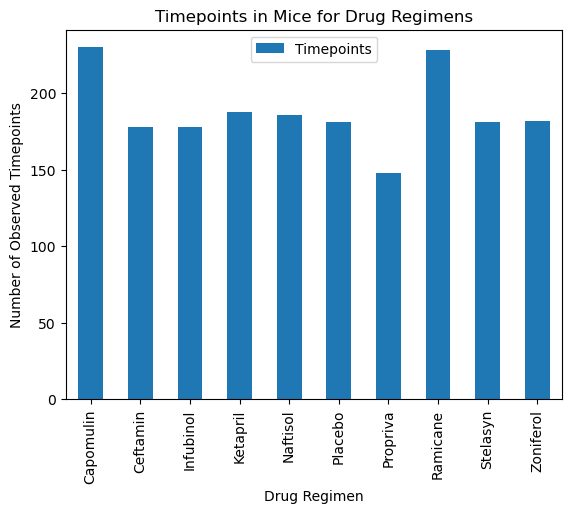

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# count the total number of timepoints for each drug regimen
mice_bars_groupings = clean_df.groupby("Drug Regimen").count()["Timepoint"]

# make a dataframe with drug regimen for x and count of timepoints for y
mice_bars = pd.DataFrame({"Drug Regimen": summary_df_2.index, \
                          "Timepoints": mice_bars_groupings})

# make it into a bar plot with pandas
mice_bars.plot(kind="bar", \
               title="Timepoints in Mice for Drug Regimens", \
               xlabel="Drug Regimen", \
               ylabel ="Number of Observed Timepoints")

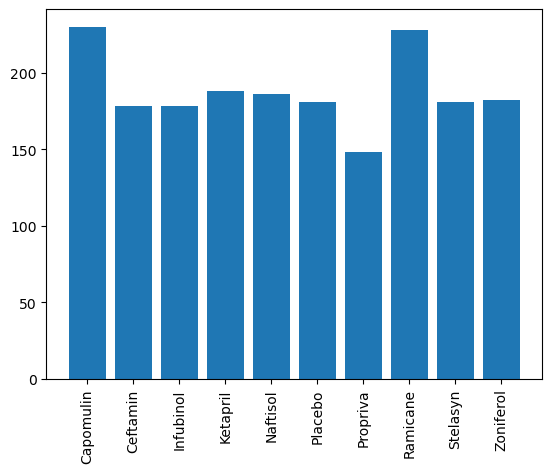

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mice_bars["Drug Regimen"], mice_bars["Timepoints"])
plt.xticks(mice_bars["Drug Regimen"], mice_bars.index, rotation="vertical")
plt.show()

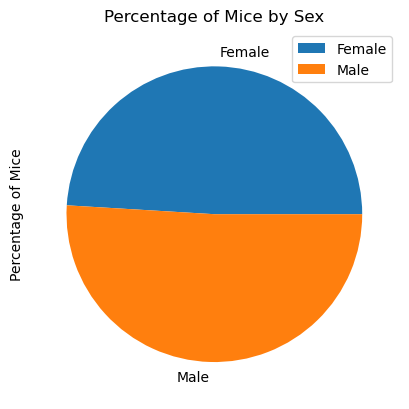

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_pie_groupings = clean_df.groupby("Sex").count()["Mouse ID"]

mice_pie= pd.DataFrame({"Sex": mice_pie_groupings.index, \
                        "Percentage of Mice": mice_pie_groupings})

mice_pie.plot(kind="pie", \
              x="Sex", \
              y="Percentage of Mice", \
              title="Percentage of Mice by Sex", \
              xlabel="Sex",
              ylabel="Percentage of Mice")
plt.show()

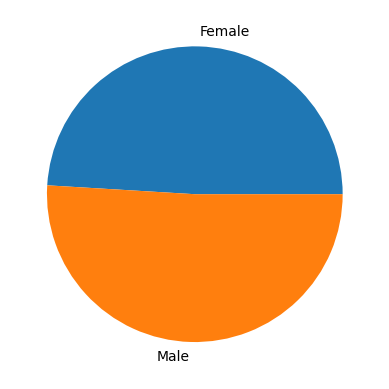

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mice_pie["Percentage of Mice"], \
        labels=["Female", "Male"])
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# filter by treatment regimen
capomulin = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
ramicane = clean_df[clean_df["Drug Regimen"] == "Ramicane"]
infubinol = clean_df[clean_df["Drug Regimen"] == "Infubinol"]
ceftamin = clean_df[clean_df["Drug Regimen"] == "Ceftamin"]

# find last (greatest) timepoints
timepoint_capomulin = capomulin.groupby(["Mouse ID"]).max("Timepoint")
timepoint_ramicane = ramicane.groupby(["Mouse ID"]).max("Timepoint")
timepoint_infubinol = infubinol.groupby(["Mouse ID"]).max("Timepoint")
timepoint_ceftamin = ceftamin.groupby(["Mouse ID"]).max("Timepoint")

timepoint_capomulin["Drug Regimen"] = "Capomulin"
timepoint_ramicane["Drug Regimen"] = "Ramicane"
timepoint_infubinol["Drug Regimen"] = "Infubinol"
timepoint_ceftamin["Drug Regimen"] = "Ceftamin"

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

timepoint_df = timepoint_capomulin.merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")[["Mouse ID", "Timepoint", "Tumor Volume (mm3)_x", "Drug Regimen_x"]]
timepoint_df = timepoint_ramicane.merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")[["Mouse ID", "Timepoint", "Tumor Volume (mm3)_x", "Drug Regimen_x"]]
timepoint_df = timepoint_infubinol.merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")[["Mouse ID", "Timepoint", "Tumor Volume (mm3)_x", "Drug Regimen_x"]]
timepoint_df = timepoint_ceftamin.merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")[["Mouse ID", "Timepoint", "Tumor Volume (mm3)_x", "Drug Regimen_x"]]


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    quartiles = clean_df[clean_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data_capomulin = timepoint_capomulin["Tumor Volume (mm3)"]
    tumor_data_ramicane = timepoint_ramicane["Tumor Volume (mm3)"]
    tumor_data_infubinol = timepoint_infubinol["Tumor Volume (mm3)"]
    tumor_data_ceftamin = timepoint_ceftamin["Tumor Volume (mm3)"]
    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    [tumor_data.append(i) for i in clean_df[clean_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"] if (i < lower_bound) | (i > upper_bound)]

    print(f"{treatment}'s potential outliers: {tumor_data}")

Capomulin's potential outliers: [25.47214326, 23.34359787]
Ramicane's potential outliers: [25.47214326, 23.34359787, 22.05012627]
Infubinol's potential outliers: [25.47214326, 23.34359787, 22.05012627]
Ceftamin's potential outliers: [25.47214326, 23.34359787, 22.05012627]


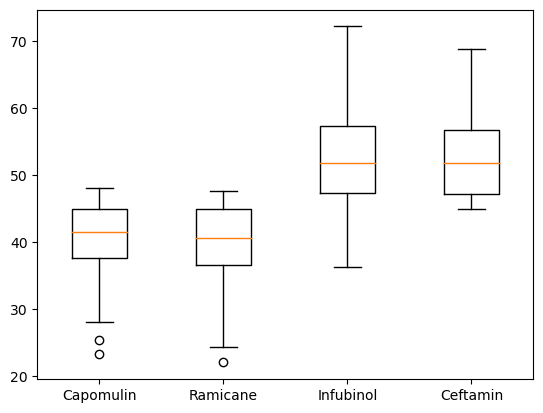

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot([capomulin["Tumor Volume (mm3)"], \
            ramicane["Tumor Volume (mm3)"], \
            infubinol["Tumor Volume (mm3)"], \
            ceftamin["Tumor Volume (mm3)"]],
            labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.title
plt.show()

## Line and Scatter Plots

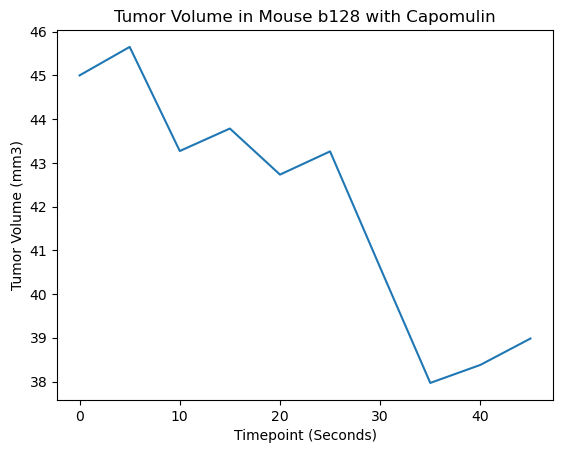

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_timepoints = clean_df[(clean_df["Mouse ID"] == "b128") & \
                                (clean_df["Drug Regimen"] == "Capomulin")]

plt.plot(capomulin_timepoints["Timepoint"], capomulin_timepoints["Tumor Volume (mm3)"])
plt.title("Tumor Volume in Mouse b128 with Capomulin")
plt.xlabel("Timepoint (Seconds)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

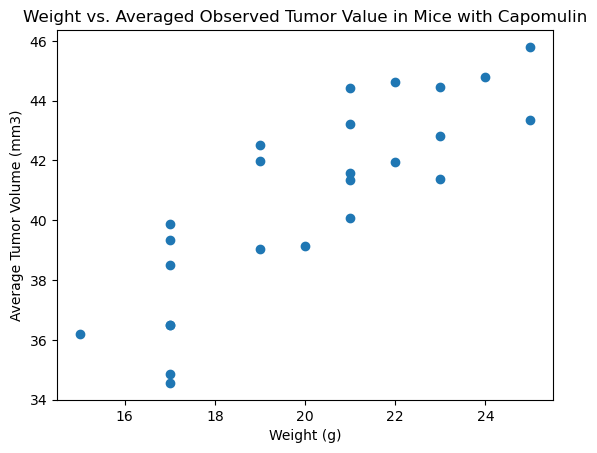

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_capomulin = clean_df[clean_df["Drug Regimen"] == "Capomulin"]\
                           .groupby("Mouse ID")\
                           .mean(["Weight (g)", "Tumor Volume (mm3)"])\
                           [["Weight (g)", "Tumor Volume (mm3)"]]


plt.scatter(weight_capomulin["Weight (g)"], weight_capomulin["Tumor Volume (mm3)"])
plt.title("Weight vs. Averaged Observed Tumor Value in Mice with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show

## Correlation and Regression

The correlation between weight and the averge tumor volume is 0.84


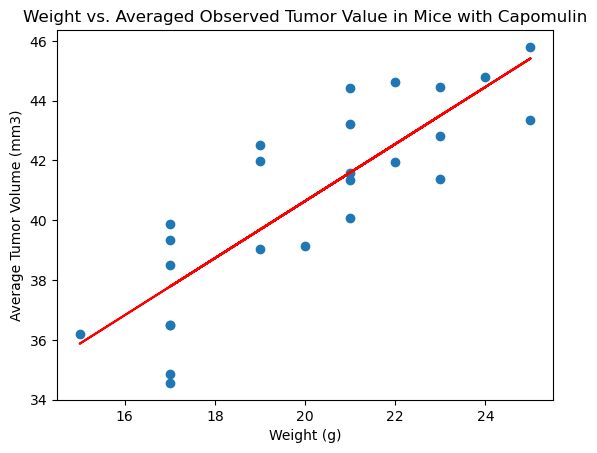

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# finding the correlation
correlation = round(st.pearsonr(weight_capomulin["Weight (g)"], weight_capomulin["Tumor Volume (mm3)"])[0], 2)

# creating the previous scatterplot
plt.scatter(weight_capomulin["Weight (g)"], weight_capomulin["Tumor Volume (mm3)"])
plt.title("Weight vs. Averaged Observed Tumor Value in Mice with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# calculating the linear regression
x = weight_capomulin["Weight (g)"]
slope, line_int, r, p, se = st.linregress(weight_capomulin["Weight (g)"], weight_capomulin["Tumor Volume (mm3)"])
line_fit = slope * x + line_int

# plotting the line
plt.plot(x, line_fit, color="red")
plt.show

# printing the correlation
print("The correlation between weight and the averge tumor volume is " + str(correlation))